In [1]:
from graph_plot import *
from degree_normalized_eigenvectors import *
from graph_class import Graph

[ 1 -2  3 -4]
Computing eigenvector  0 ...
Computing eigenvector  1 ...
Test results: 
SVD decomposition of matrix A = 
[[-0.89907453 -0.70612866  0.15129605  0.17920327 -0.89330021]
 [-0.70612866  0.49444357  0.00305816  0.06207315 -0.70056966]
 [ 0.15129605  0.00305816  0.18131065 -0.03636562  0.07569994]
 [ 0.17920327  0.06207315 -0.03636562  0.1403473   0.05219538]
 [-0.89330021 -0.70056966  0.07569994  0.05219538 -0.40131679]]
:
u =  [[-0.72425669 -0.17856284  0.61803559 -0.02710617 -0.24670798]
 [-0.36796056  0.91018231 -0.11090336  0.07435089  0.13544584]
 [ 0.07204906 -0.07130585  0.27221371  0.85582904  0.42799621]
 [ 0.08648817  0.0102534   0.38645579 -0.51088502  0.76293059]
 [-0.57217655 -0.36673398 -0.61829125  0.01703984  0.3943929 ]]
s =  [2.        0.9157102 0.3       0.2       0.1      ]
vt =  [[ 0.72425669  0.36796056 -0.07204906 -0.08648817  0.57217655]
 [-0.17856284  0.91018231 -0.07130585  0.0102534  -0.36673398]
 [ 0.61803559 -0.11090336  0.27221371  0.38645579 -0

In [2]:
# Adjacency matrix
A = np.loadtxt('../data/graph.txt')

G = Graph()
G.set_adj_matrix(A)
G.set_degs()
# print(G.adj_matrix)
# print(G.degs)
G.set_laplacian()
G.set_adj_list()


# print(G.laplacian)

# Degree matrix
D = np.diag(G.degs)
# print(D)

# Laplacian matrix
L = G.laplacian

f = open('../data/3elt.graph')
G = Graph(f)
print(G)

 2 5 4

[graph object] nodes = 4720; edges = 13722


Finding  1 -th eigenvector...
1 - product =  1.4204734610778758e-08
Finding  2 -th eigenvector...
1 - product =  8.265647055694103e-10
Computing eigenvector  0 ...
Computing eigenvector  1 ...


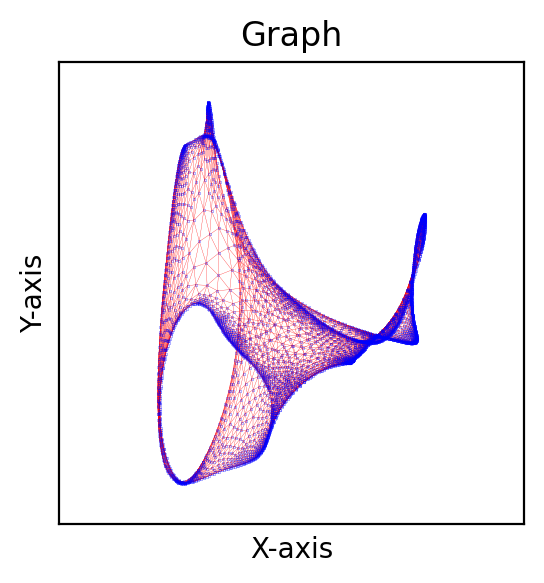

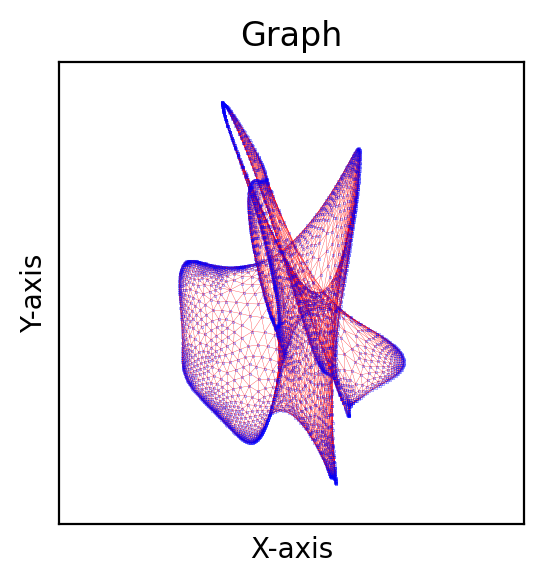

In [4]:
#Degree normalized eigenvectors
U, times = degree_normalized_eigenvectors(np.diag(G.degs), G.adj_matrix, 2, tol = 1e-6, max_iter = 2000, matmul = True)

B = 0.5 * (np.eye(G.n_nodes) + np.diag(1. / G.degs)@G.adj_matrix)
V = power_method(B, 2)
#2D graph plot coordinates
x_coord = U[:, 0]
y_coord = U[:, 1]
x_coord2 = V[:, 0]
y_coord2 = V[:, 1]
graph_plot(G.adj_matrix, x_coord, y_coord, node_size = 0.01, figsize = (3,3), dpi = 200, add_labels= False)
graph_plot(G.adj_matrix, x_coord2, y_coord2, node_size = 0.01, figsize = (3,3), dpi = 200, add_labels= False)


Computing eigenvector  0 ...
Computing eigenvector  0 ...
Computing eigenvector  1 ...
Computing eigenvector  2 ...


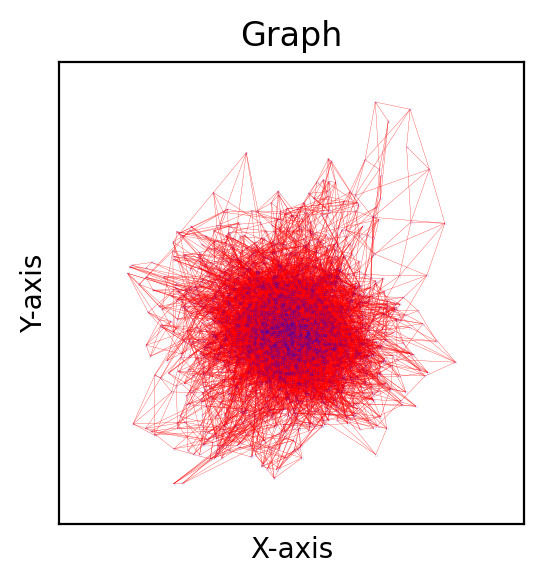

In [5]:
#print(x_coord)
#print(y_coord)
p = 3
m = 50
V, B, X = hde_spectral_drawing(G, p, m, tol = 1e-10, max_iters = 10000, test = False, use_gershgorin = False)
x_coord, y_coord = V[:,0], V[:,1]

graph_plot(G.adj_matrix, x_coord, y_coord, node_size = 0.001, figsize = (3,3), add_labels = False)

In [ ]:
B_u, B_s, B_vt = np.linalg.svd(B)
x_coord2, y_coord2 = X@B_u[:,0], X@B_u[:,1]
print(x_coord2, y_coord2)
print(len(x_coord2), len(y_coord2))

In [ ]:
plt.scatter(x_coord2, y_coord2, s = 0.001)

In [ ]:
B = 0.5 * (np.eye(G.n_nodes) + np.diag(1. / G.degs)@G.adj_matrix)

In [ ]:
u, s, vt = np.linalg.svd(B)

In [ ]:
graph_plot(G.adj_matrix, u[:,0], u[:,1], node_size = 0.001, figsize = (3,3), add_labels = False)